In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [5]:
n, k, seed = 500, 30, 0 

In [21]:
# Binning method
from math import ceil
result_binning = {}
for degree in [2, 3, 4, 5, 10, 20]:
    found = 0
    not_found = 0
    print("degree=", degree)
    result_binning[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            cs_bins_range = np.linspace(0.2 * degree ** 2 if degree < 10 else 0.05 * degree ** 2,
                                        degree ** 2 if degree < 10 else 0.5 * degree ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        path = f"../results_synthetic/binning/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_csratio={cs_ratio}_seed={seed}.json"
                        try:
                            f = open(path)
                            found += 1 
                            data = json.loads(f.read())
                            # print(data)
                            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                            if normalized_mse < 0.1:
                                result_binning[degree].append((data["measurements"], normalized_mse*100 , data["C"], data["ratio"], data["cs_bins"], data["cs_iteraions"], data["cs_ratio"]))
                                #if data["equality"]==True:
                            #    result_binning[degree].append(data["measurements"])
                        except:
                            not_found+=1
                            # print(f"Could not find {path}")
                            #        f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                            #        f"csratio={cs_ratio}.json")
    print(f"found {found}, not found {not_found}")


degree= 2
found 5724, not found 1842
degree= 3
found 6804, not found 758
degree= 4
found 7344, not found 216
degree= 5
found 7452, not found 108
degree= 10
found 7487, not found 73
degree= 20
found 7560, not found 0


In [22]:
result_reed_solomon = {}
for degree in [2, 3, 4, 5, 10, 20]:
    print(degree)
    found, not_found = 0, 0
    result_reed_solomon[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            path = f"../results_synthetic/reed_solomon_synthetic/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}.json"
            try:
                f =open(path)
                found +=1
                data = json.loads(f.read())
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                if normalized_mse < 0.1:
                    result_reed_solomon[degree].append((data["measurements"], normalized_mse*100))
            except:
                not_found+=1
                #bprint(f"Could not find {path}")
    print(found, not_found)

2
42 0
3
42 0
4
42 0
5
42 0
10
42 0
20
42 0


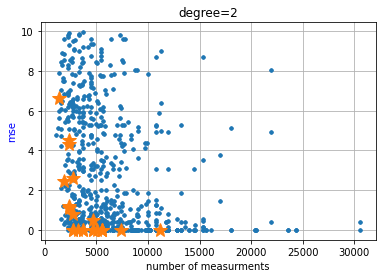

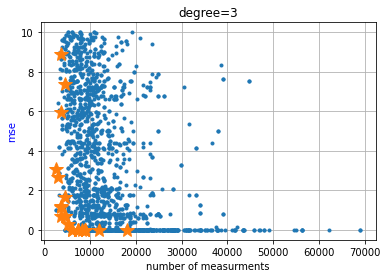

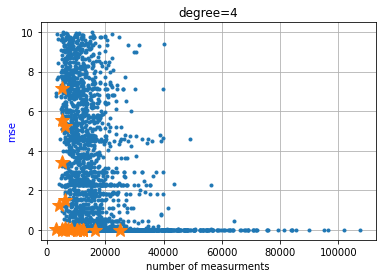

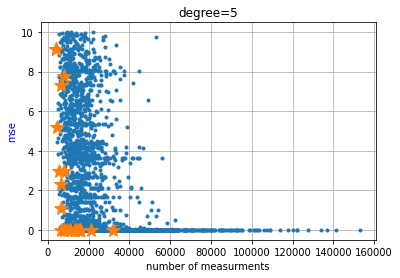

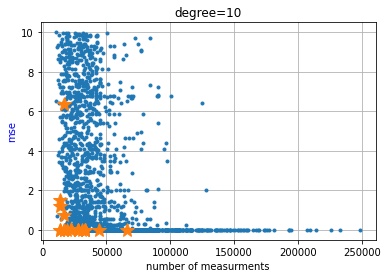

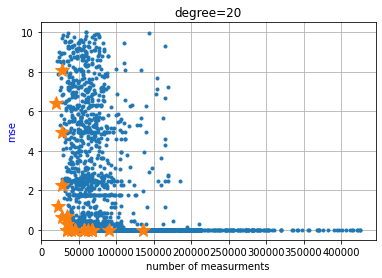

In [8]:
for degree in [2, 3, 4, 5, 10, 20]:  
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurements")
    ax.plot([a[0] for a in result_binning[degree]],[a[1] for a in result_binning[degree]],'.')
    ax.plot([a[0] for a in result_reed_solomon[degree]],[a[1] for a in result_reed_solomon[degree]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    plt.savefig(f"plots/reed_solomon/superconduct-n={n}_d={degree}", dpi=300)
    plt.show()


In [23]:
# Random measurement method
from math import ceil
result_random = {}
for degree in [2,3,4,5]:
    print(degree)
    result_random[degree] = []
    found, not_found = 0, 0
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            for sampling_factor in np.linspace(0.2, 2.0, 10):
                dir_string=f"../results_synthetic/random_parallel/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}_seed={seed}.json"
                try:
                    f =open(dir_string)
                    found += 1
                    data = json.loads(f.read())
                    print(data)
                    normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                    if normalized_mse < 0.1:
                        result_random[degree].append((data["measurements"], normalized_mse*100, data["C"], data["ratio"], data["sampling_factor"]))
                    
                    #if data["equality"]==True:
                    #    result_random[degree].append(data["measurements"])
                except:
                    not_found += 1
                    print(f" Couldn't find {dir_string}")
    print(found, not_found)

2
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 3.2901763916015625e-05, 'time_cached': 1.239776611328125e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.4, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 0.00010943412780761719, 'time_cached': 1.5735626220703125e-05, 'equality': False, 'mse': 88652, 'true_fourier_norm_squared': 88652, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.6000000000000001, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 4.267692565917969e-05, 'time_cached': 1.5974044799804688e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree'

{'n': 500, 'k': 30, 'degree': 5, 'C': 1.6, 'ratio': 3.0, 'sampling_factor': 1.8, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 9781.384845733643, 'time_cached': 9725.725847005844, 'equality': False, 'mse': 14072.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 90519.0, 'measurements': 11120}
{'n': 500, 'k': 30, 'degree': 5, 'C': 1.6, 'ratio': 3.0, 'sampling_factor': 2.0, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 12113.266059398651, 'time_cached': 12837.017893075943, 'equality': False, 'mse': 35915.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 89914.0, 'measurements': 12400}
{'n': 500, 'k': 30, 'degree': 5, 'C': 1.8, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 17.152663707733154, 'time_cached': 5.73533821105957, 'equality': False, 'mse': 564536.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 527061.0, 'measurements': 3072}
{'n': 500, 'k': 30, 'degree': 5

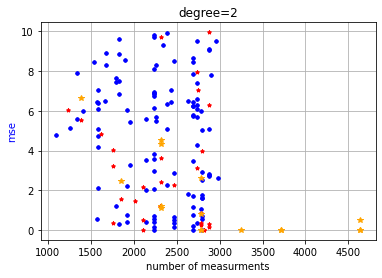

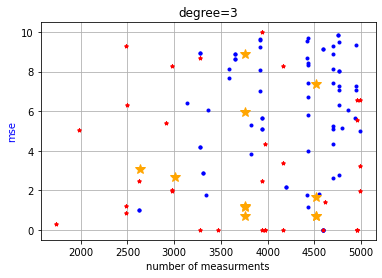

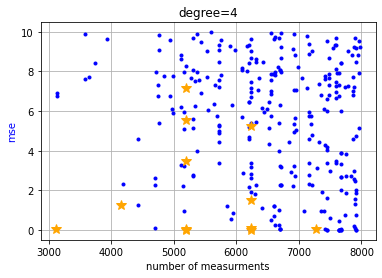

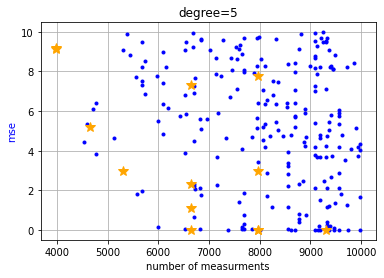

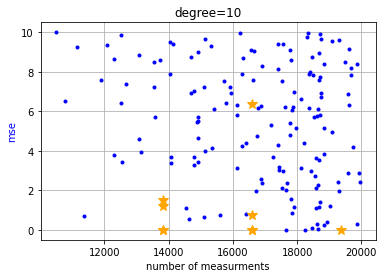

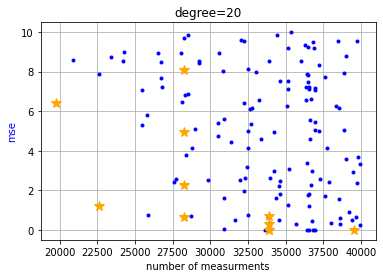

In [28]:
for degree in [2,3,4,5,10,20]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    if degree == 2: 
        ax.plot([a[0] for a in result_binning[degree] if a[0]<3000],[a[1] for a in result_binning[degree] if a[0]<3000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<3000],[a[1] for a in result_random[degree] if a[0]<3000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<5000],[a[1] for a in result_reed_solomon[degree] if a[0]<5000],'*', color="#FFA500")
    if degree == 3:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<5000],[a[1] for a in result_binning[degree] if a[0]<5000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<5000],[a[1] for a in result_random[degree] if a[0]<5000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<5000],[a[1] for a in result_reed_solomon[degree] if a[0]<5000],'*', color="#FFA500", markersize=10)
    
    if degree == 4:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<8000],[a[1] for a in result_binning[degree] if a[0]<8000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<8000],[a[1] for a in result_random[degree] if a[0]<8000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<8000],[a[1] for a in result_reed_solomon[degree] if a[0]<8000],'*', color="#FFA500", markersize=10)
    
    if degree ==5:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<10000],[a[1] for a in result_binning[degree] if a[0]<10000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<10000],[a[1] for a in result_reed_solomon[degree] if a[0]<10000],'*', color="#FFA500", markersize=10)
    
    if degree ==10:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<20000],[a[1] for a in result_binning[degree] if a[0]<20000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<20000],[a[1] for a in result_reed_solomon[degree] if a[0]<20000],'*', color="#FFA500", markersize=10)
    
    if degree ==20:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<40000],[a[1] for a in result_binning[degree] if a[0]<40000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<40000],[a[1] for a in result_reed_solomon[degree] if a[0]<40000],'*', color="#FFA500", markersize=10)
    
    # ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'g*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [29]:
a = sorted(result_random[2])
print(a)

[(1232, 6.06195519730059, 0.6, 1.6, 0.6000000000000001), (1392, 5.559330771393758, 0.4, 1.1, 0.8), (1624, 4.814603786816269, 0.6, 1.6, 0.8), (1760, 0.3374261880213703, 1.0, 1.6, 0.6000000000000001), (1760, 3.2160933545786854, 0.6, 1.1, 0.6000000000000001), (1760, 4.011622457587403, 1.6, 3.0, 0.6000000000000001), (1856, 1.5746555440997283, 0.8, 1.6, 0.8), (2016, 1.4757433309963566, 0.6, 1.6, 1.0), (2112, 0.0022560122727067634, 1.0, 1.1, 0.6000000000000001), (2112, 0.4750363548230732, 0.8, 1.1, 0.6000000000000001), (2112, 2.1745243228043867, 1.8, 3.0, 0.6000000000000001), (2304, 1.2231699315774673, 0.8, 1.6, 1.0), (2320, 2.425250726403599, 1.0, 1.6, 0.8), (2320, 3.611477572559367, 0.6, 1.1, 0.8), (2320, 9.697488049489174, 1.2, 3.0, 0.8), (2464, 2.2776267691442498, 1.2, 1.6, 0.6000000000000001), (2736, 3.1059611959883773, 0.4, 1.1, 1.6), (2736, 7.975208548130097, 1.0, 3.0, 1.6), (2752, 7.07043304282953, 0.8, 1.6, 1.2), (2784, 0.22340627548227832, 1.0, 1.1, 0.8), (2784, 0.3374261880213703,

In [30]:
a = sorted(result_binning[2])
print(a)

[(1096, 4.801293467054082, 0.6, 1.6, 2, 1, 1.1), (1096, 4.801293467054082, 0.6, 1.6, 2, 1, 1.1), (1096, 4.801293467054082, 0.6, 1.6, 2, 1, 1.1), (1264, 5.115174077566465, 0.8, 1.6, 2, 1, 3.0), (1264, 5.115174077566465, 0.8, 1.6, 2, 1, 3.0), (1264, 5.115174077566465, 0.8, 1.6, 2, 1, 3.0), (1344, 5.6143968506889115, 1.0, 3.0, 3, 1, 2.1), (1344, 5.6143968506889115, 1.0, 3.0, 3, 1, 2.1), (1344, 5.6143968506889115, 1.0, 3.0, 3, 1, 2.1), (1344, 7.918970850126534, 0.4, 1.1, 3, 1, 1.3), (1344, 7.918970850126534, 0.4, 1.1, 3, 1, 1.3), (1344, 7.918970850126534, 0.4, 1.1, 3, 1, 1.3), (1408, 5.972912175461618, 0.4, 1.1, 2, 2, 1.1), (1408, 5.972912175461618, 0.4, 1.1, 2, 2, 1.1), (1408, 5.972912175461618, 0.4, 1.1, 2, 2, 1.1), (1536, 8.446199268909925, 1.4, 3.0, 2, 1, 1.1), (1536, 8.446199268909925, 1.4, 3.0, 2, 1, 1.1), (1536, 8.446199268909925, 1.4, 3.0, 2, 1, 1.1), (1568, 0.5494891742431343, 0.6, 1.6, 3, 1, 3.0), (1568, 0.5494891742431343, 0.6, 1.6, 3, 1, 3.0), (1568, 0.5494891742431343, 0.6, 1.

In [41]:
[a[0] for a in result_binning[depth] if a[0]<30000]

[3584,
 6912,
 6800,
 4944,
 5056,
 5984,
 6928,
 6928,
 5984,
 6928,
 6928,
 3920,
 3920,
 7120,
 6624,
 6624,
 5408,
 9760,
 6880,
 4432,
 4432,
 4432,
 4432,
 4432,
 8320,
 7728,
 7088,
 6624,
 5904,
 11472,
 9792,
 7424,
 4768,
 4768,
 4768,
 4768,
 9248,
 8624,
 7968,
 7376,
 6944,
 12976,
 11232,
 10160,
 8848,
 5168,
 5168,
 5168,
 5168,
 5168,
 9888,
 9008,
 7888,
 7888,
 14192,
 11696,
 11696,
 9360,
 8160,
 5168,
 5168,
 5168,
 5168,
 5168,
 9888,
 9008,
 7888,
 7888,
 14192,
 11696,
 11696,
 9360,
 8160,
 3304,
 3304,
 4984,
 3136,
 5792,
 4936,
 3344,
 7056,
 6192,
 3648,
 3648,
 6312,
 6312,
 5528,
 5528,
 8160,
 3648,
 3648,
 6312,
 6312,
 5528,
 5528,
 8160,
 3360,
 5888,
 5888,
 7712,
 7168,
 8320,
 8320,
 6688,
 7168,
 8320,
 8320,
 6688,
 4704,
 4704,
 8544,
 7904,
 7904,
 7296,
 6496,
 11712,
 10496,
 9664,
 8256,
 5312,
 5312,
 5312,
 10016,
 9216,
 8544,
 8000,
 8000,
 7136,
 13760,
 11744,
 10400,
 8960,
 8960,
 5728,
 5728,
 5728,
 11040,
 10304,
 9568,
 8864,
 7